# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.746739e+01     1.353388e+01
 * time: 0.0015690326690673828
     1     3.046450e+01     6.417268e+00
 * time: 0.0065479278564453125
     2     2.768416e+01     4.818063e+00
 * time: 0.011841058731079102
     3     2.272019e+01     2.647425e+00
 * time: 0.01700305938720703
     4     2.068179e+01     2.021774e+00
 * time: 0.0221710205078125
     5     1.959728e+01     1.541682e+00
 * time: 0.027524948120117188
     6     1.932754e+01     2.067365e+00
 * time: 0.03201889991760254
     7     1.904886e+01     1.796727e+00
 * time: 0.03644990921020508
     8     1.852975e+01     1.340032e+00
 * time: 0.0409390926361084
     9     1.813674e+01     1.517199e+00
 * time: 0.1518089771270752
    10     1.784898e+01     1.063118e+00
 * time: 0.157073974609375
    11     1.756760e+01     8.100212e-01
 * time: 0.1621699333190918
    12     1.741309e+01     6.283331e-01
 * time: 0.16722989082336426
    13     1.731445e+01     8.191073e-01
 * time:

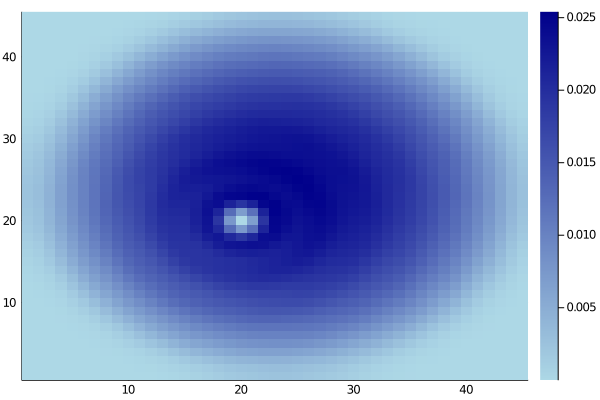

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)